* Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

256


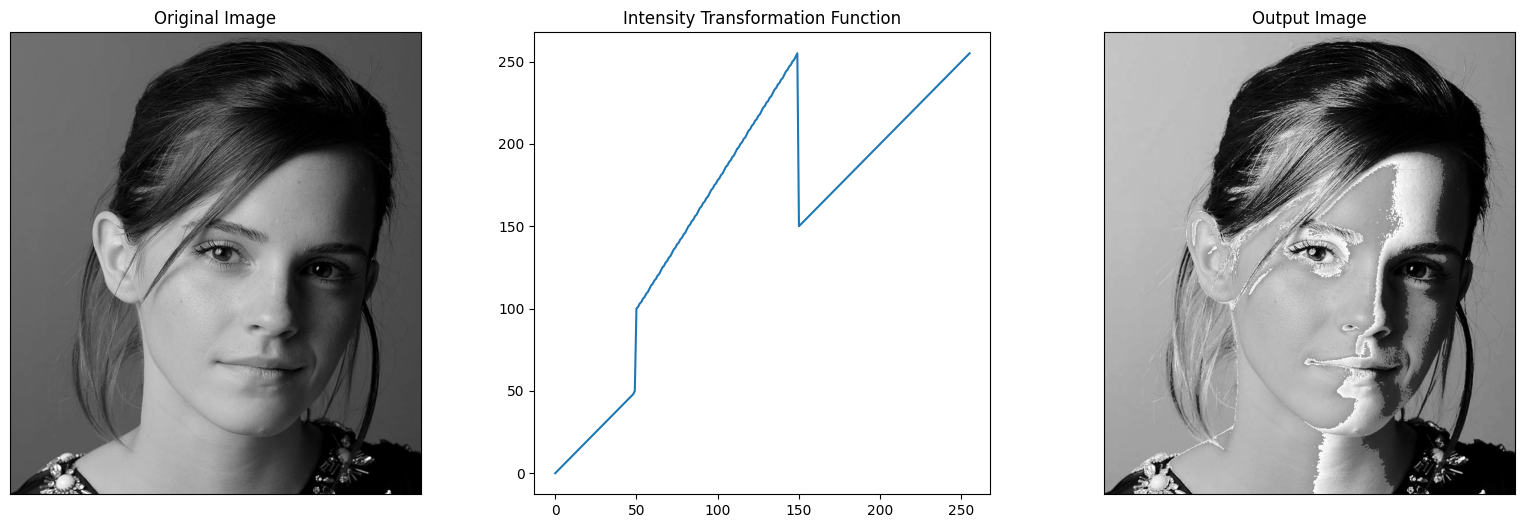

In [6]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(image_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.show()

* Question 2
a)

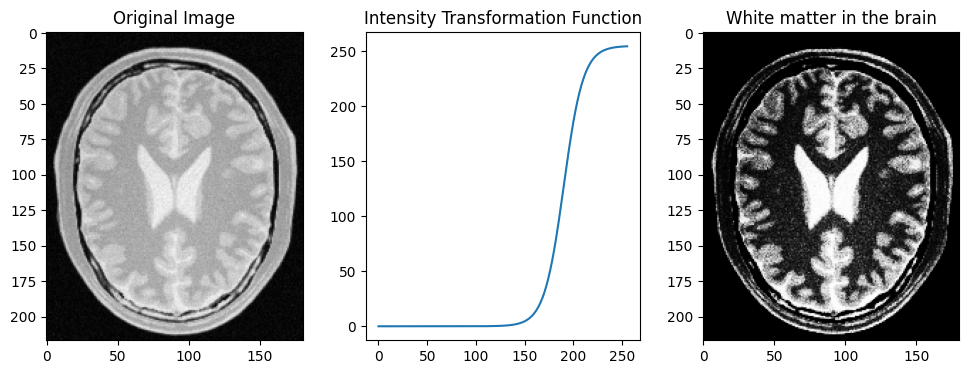

In [9]:
def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 190
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)
transform2 = white_matter_curve(f)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(fig2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].plot(transform2)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
ax[2].set_title("White matter in the brain")

plt.show()

b)

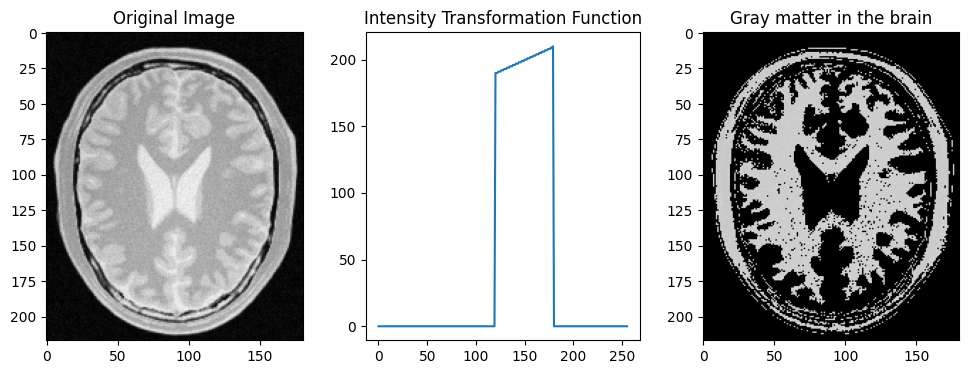

In [6]:
transform3 = np.concatenate((np.linspace(0, 0, 120), np.linspace(190, 210, 60),np.linspace(0, 0, 76)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(fig2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].plot(transform3)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
ax[2].set_title("Gray matter in the brain")

plt.show()

* Question 3

Text(0, 0.5, 'Frequency')

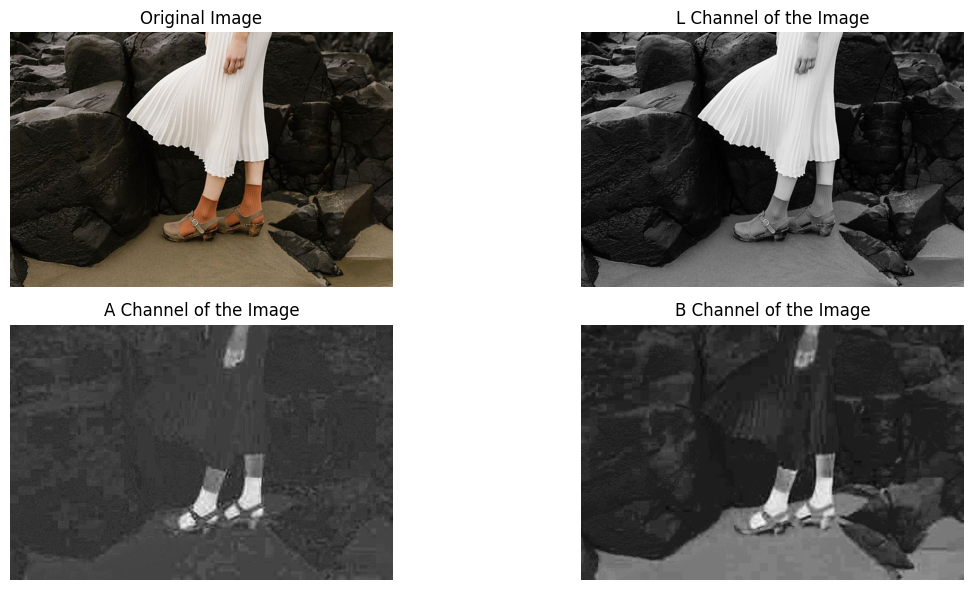

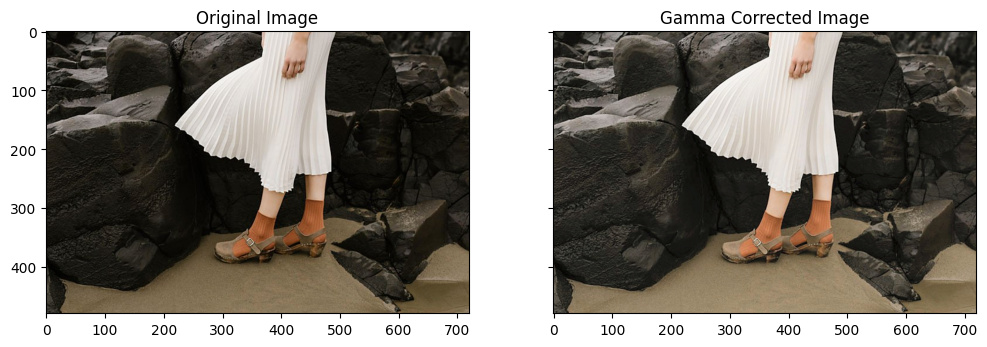

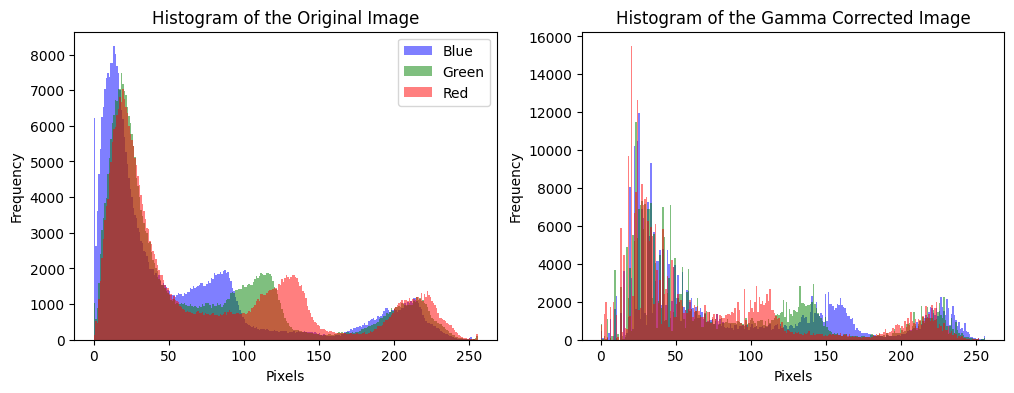

In [2]:
source_image = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

rgb_image = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(source_image, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(13,6))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.75
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].hist(source_image[:,:,0].flatten(), bins=256, range=[0,256], color='b', alpha=0.5, label = 'Blue')
ax[0].hist(source_image[:,:,1].flatten(), bins=256, range=[0,256], color='g', alpha=0.5, label = 'Green')
ax[0].hist(source_image[:,:,2].flatten(), bins=256, range=[0,256], color='r', alpha=0.5, label = 'Red')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].hist(img_corrected[:,:,0].flatten(), bins=256, range=[0,256], color='b', alpha=0.5, label = 'Blue')
ax[1].hist(img_corrected[:,:,1].flatten(), bins=256, range=[0,256], color='g', alpha=0.5, label = 'Green')
ax[1].hist(img_corrected[:,:,2].flatten(), bins=256, range=[0,256], color='r', alpha=0.5, label = 'Red')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

* Question 4

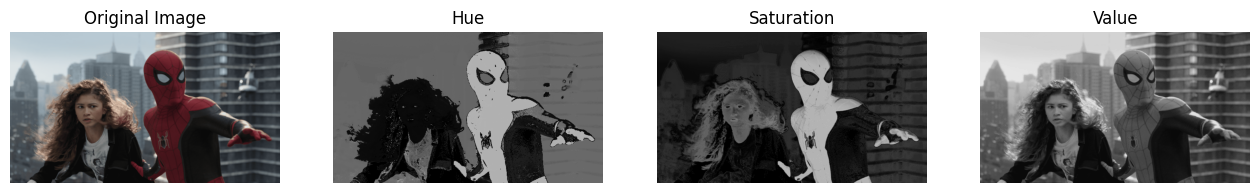

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\spider.png')
assert img is not None

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

def vibrance(x, a, sigma=70):
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))  # Transformation function

def transform(a):
    # This function will apply the desired transformation to selected planes of the image
    plt.clf()
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    h_channel, s_channel, v_channel = cv.split(img_hsv)    # Split the image into hue, saturation and value planes
    s_channel_corrected = cv.LUT(s_channel, table)          # Apply vibrance correction to the saturation plane
    img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
    img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)
    #region
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_corrected_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    #endregion

# Interactive Slider
final_plot = interactive(transform, a=(0, 1, 0.001))
output = final_plot.children[-1]
output.layout.height = '400px'
final_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.001), Output(layout=Layout(heigh…

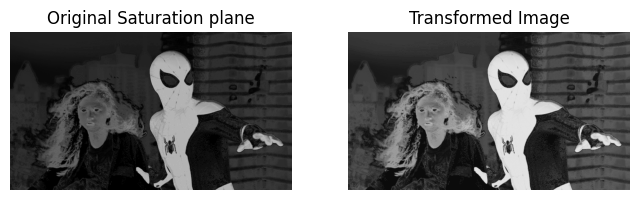

In [7]:
a = 0.48
table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
h_channel, s_channel, v_channel = cv.split(img_hsv)
s_channel_corrected = cv.LUT(s_channel, table)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Saturation plane')
ax[1].imshow(s_channel_corrected, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for axs in ax:
    axs.axis('off')
plt.show()

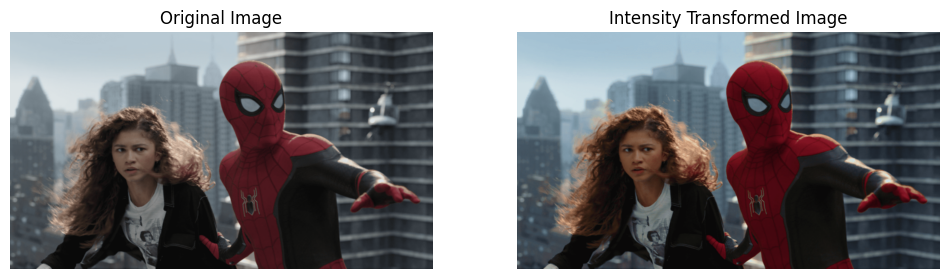

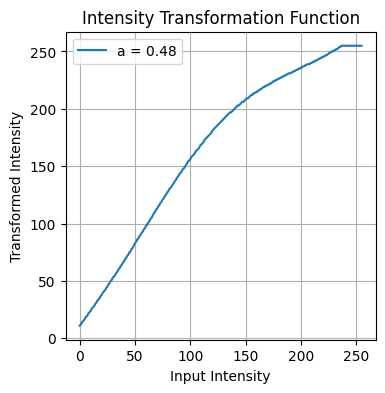

In [8]:
img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(img_corrected_rgb)
plt.title('Intensity Transformed Image')
plt.axis('off')
    
plt.show()
    
a_value = np.arange(0, 256)
plt.figure(figsize=(4,4))
plt.plot(a_value,table, label=f'a = {a}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid()
    
plt.show()

In [10]:
def histogram_equalization(image):

    # Compute the histogram
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    #cdf_normalized = cdf * hist.max()/cdf.max() 
    cdf_normalized = cdf_normalized.astype('uint8')

    # Map the original pixel values to equalized values using the normalized CDF
    equalized = cdf_normalized[image]

    return equalized

* Question 5

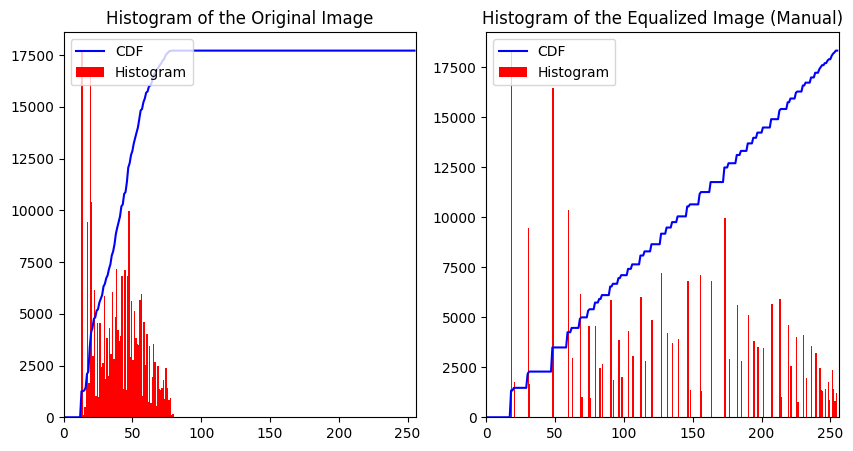

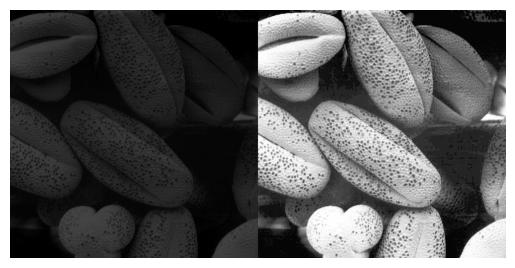

In [12]:
shell_image = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
equalized_manual = histogram_equalization(shell_image)
hist,  bins = np.histogram(shell_image.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
# Plot the original image's histogram and CDF
plt.figure(figsize=(10, 5))

# Original Image Histogram
plt.subplot(1, 2, 1)
plt.plot(cdf_normalized, color='b')
plt.hist(shell_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Original Image')

# Equalized Image Histogram (manual)
hist_eq, bins_eq = np.histogram(equalized_manual.ravel(), 256, [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_eq_normalized = cdf_eq * hist_eq.max() / cdf_eq.max()

# Plot the equalized histogram and CDF
plt.subplot(1, 2, 2)
plt.plot(cdf_eq_normalized, color='b')
plt.hist(equalized_manual.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image (Manual)')

plt.show()

res = np.hstack((shell_image, equalized_manual))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()

* Question 6
a)

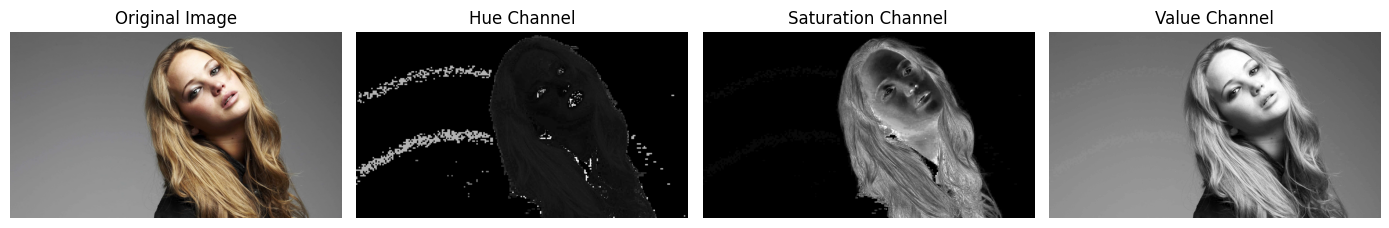

In [13]:
jennifer_image = cv.imread('a1images/jeniffer.jpg', cv.IMREAD_COLOR)
rgb_img = cv.cvtColor(jennifer_image, cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(jennifer_image, cv.COLOR_BGR2HSV)       # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv.split(img_hsv)     # Split the converted image into hue, saturation and value planes


plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(rgb_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Displaying each separate plane in gray scale
plt.subplot(142)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

b)

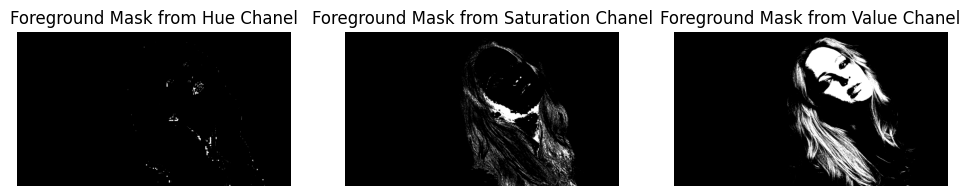

In [14]:
# Select a threshold value randomly
threshold = 165

# Apply thresholding on three channels seperately
ret1, foreground_mask1 = cv.threshold(h_channel, threshold, 255, cv.THRESH_BINARY)
ret2, foreground_mask2 = cv.threshold(s_channel, threshold, 255, cv.THRESH_BINARY)
ret3, foreground_mask3 = cv.threshold(v_channel, threshold, 255, cv.THRESH_BINARY)

plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(foreground_mask1, cmap='gray')
plt.title('Foreground Mask from Hue Chanel')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground_mask2, cmap='gray')
plt.title('Foreground Mask from Saturation Chanel')
plt.axis('off')

plt.subplot(133)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask from Value Chanel')
plt.axis('off')

plt.show()

c)

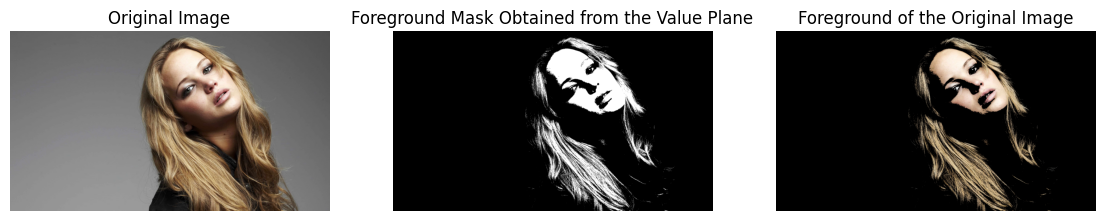

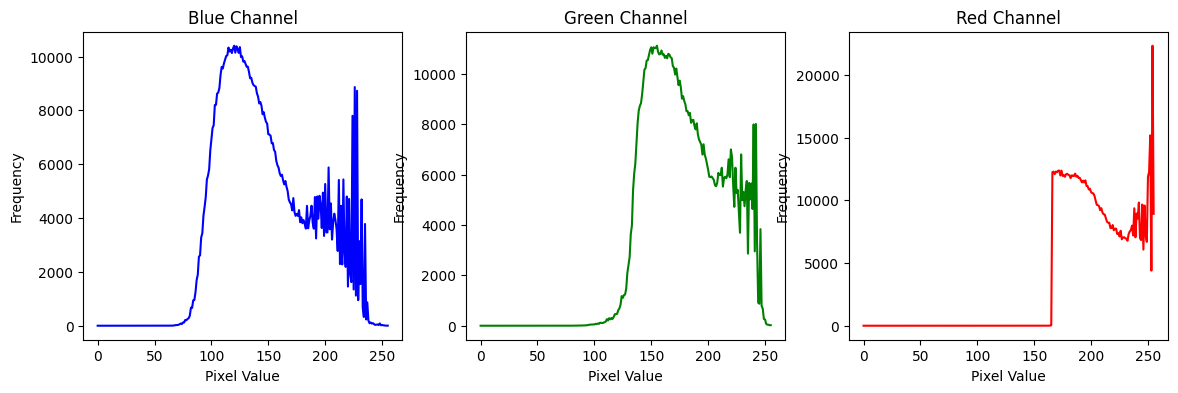

In [15]:
# Obtain the foreground using the mask from the value channel
foreground_img = cv.bitwise_and(jennifer_image, jennifer_image, mask=foreground_mask3)

# Plot the original image, foreground mask, and extracted foreground
plt.figure(figsize=(14, 6))

# Original image
plt.subplot(131)
plt.imshow(cv.cvtColor(jennifer_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
plt.title('Original Image')
plt.axis('off')

# Foreground mask (grayscale)
plt.subplot(132)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask Obtained from the Value Plane')
plt.axis('off')

# Foreground of the original image
plt.subplot(133)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Foreground of the Original Image')
plt.axis('off')

plt.show()

# Calculate histograms for the foreground of each channel in BGR color space
b_hist = cv.calcHist([foreground_img], [0], foreground_mask3, [256], [0, 256])
g_hist = cv.calcHist([foreground_img], [1], foreground_mask3, [256], [0, 256])
r_hist = cv.calcHist([foreground_img], [2], foreground_mask3, [256], [0, 256])

# Plot histograms for Blue, Green, and Red channels
plt.figure(figsize=(14, 4))

# Blue channel histogram
plt.subplot(131)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Green channel histogram
plt.subplot(132)
plt.plot(g_hist, color='green')
plt.title('Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Red channel histogram
plt.subplot(133)
plt.plot(r_hist, color='red')
plt.title('Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

d)

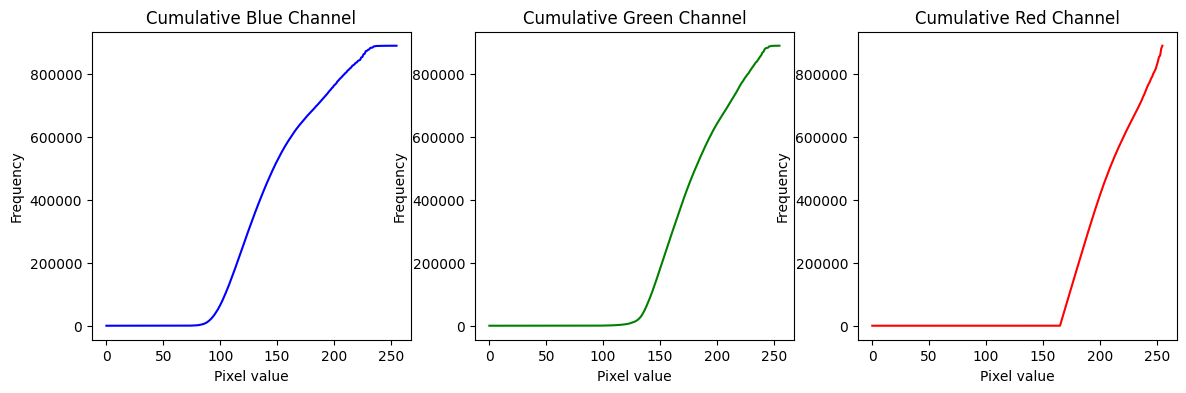

In [16]:
# Obtain the culmulative sum of the histogram
cumulative_hist_b = np.cumsum(b_hist)
cumulative_hist_g = np.cumsum(g_hist)
cumulative_hist_r = np.cumsum(r_hist)

#region
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(cumulative_hist_b, color='blue')
plt.title('Cumulative Blue Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(cumulative_hist_g, color='green')
plt.title('Cumulative Green Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(cumulative_hist_r, color='red')
plt.title('Cumulative Red Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.show()
#endregion

e)

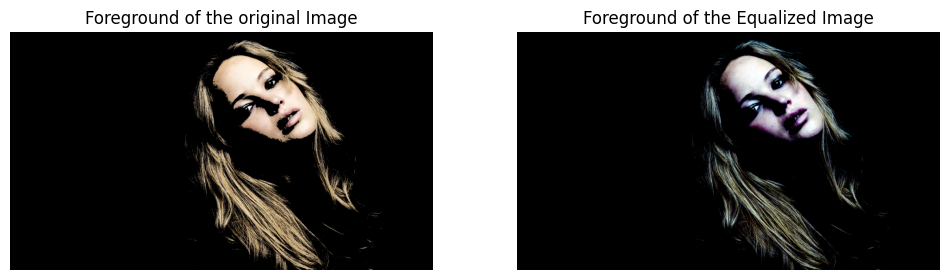

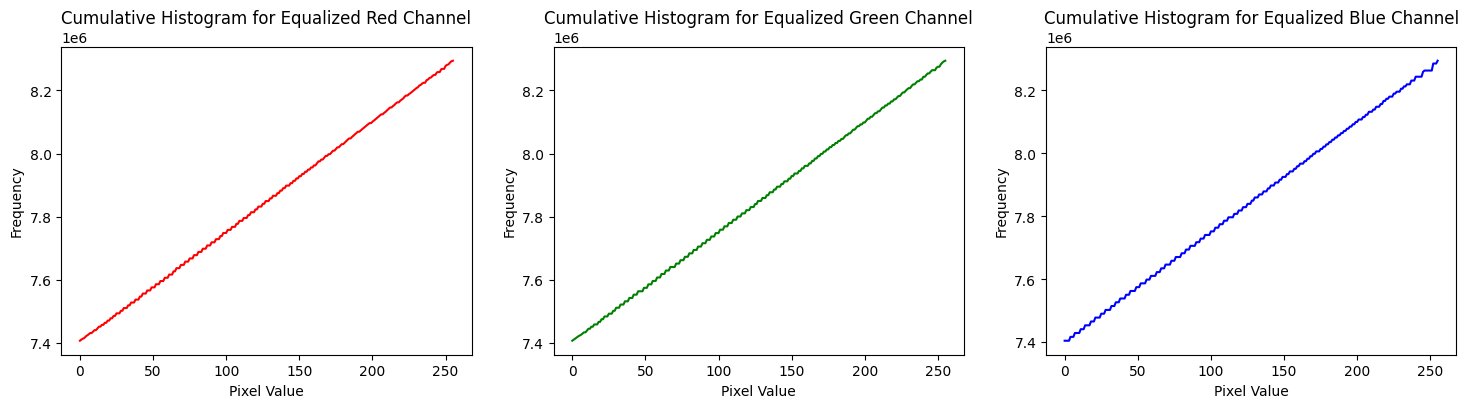

In [17]:
# Histogram equalization for three color channels
r_equalized = cv.equalizeHist(foreground_img[:, :, 0])
g_equalized = cv.equalizeHist(foreground_img[:, :, 1])
b_equalized = cv.equalizeHist(foreground_img[:, :, 2])

# Merge the equalized channels
equalized_img = cv.merge((r_equalized, g_equalized, b_equalized))

# Calculate the histograms for channels
r_equalized_hist = cv.calcHist([equalized_img], [0], None, [256], [0, 256])
g_equalized_hist = cv.calcHist([equalized_img], [1], None, [256], [0, 256])
b_equalized_hist = cv.calcHist([equalized_img], [2], None, [256], [0, 256])

# Calculate the CDF for equalized channels
r_cumulative = np.cumsum(r_equalized_hist)
g_cumulative = np.cumsum(g_equalized_hist)
b_cumulative = np.cumsum(b_equalized_hist)

#region
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.plot(r_cumulative, color='red')
plt.title('Cumulative Histogram for Equalized Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(g_cumulative, color='green')
plt.title('Cumulative Histogram for Equalized Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(b_cumulative, color='blue')
plt.title('Cumulative Histogram for Equalized Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
#endregion

f)

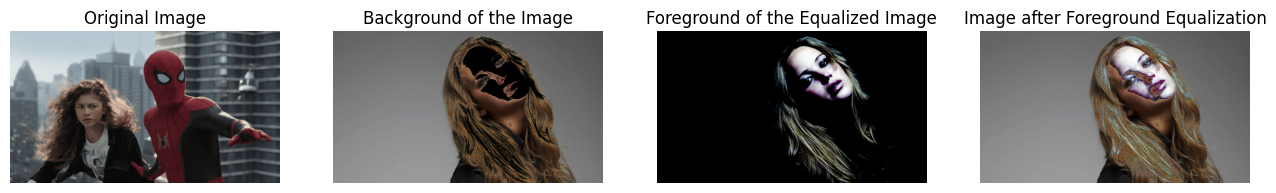

In [18]:
# Extract the background by bitwise_not
background = cv.bitwise_and(jennifer_image, jennifer_image, mask=cv.bitwise_not(foreground_mask3))

final_modified_img = cv.add(background, equalized_img)
final_modified_img_rgb = cv.cvtColor(final_modified_img, cv.COLOR_BGR2RGB)

#region
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(142)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title("Background of the Image")
plt.axis('off')

plt.subplot(143)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(final_modified_img_rgb)
plt.title("Image after Foreground Equalization")
plt.axis('off')

plt.show()
#endregion

* Question 7
a)

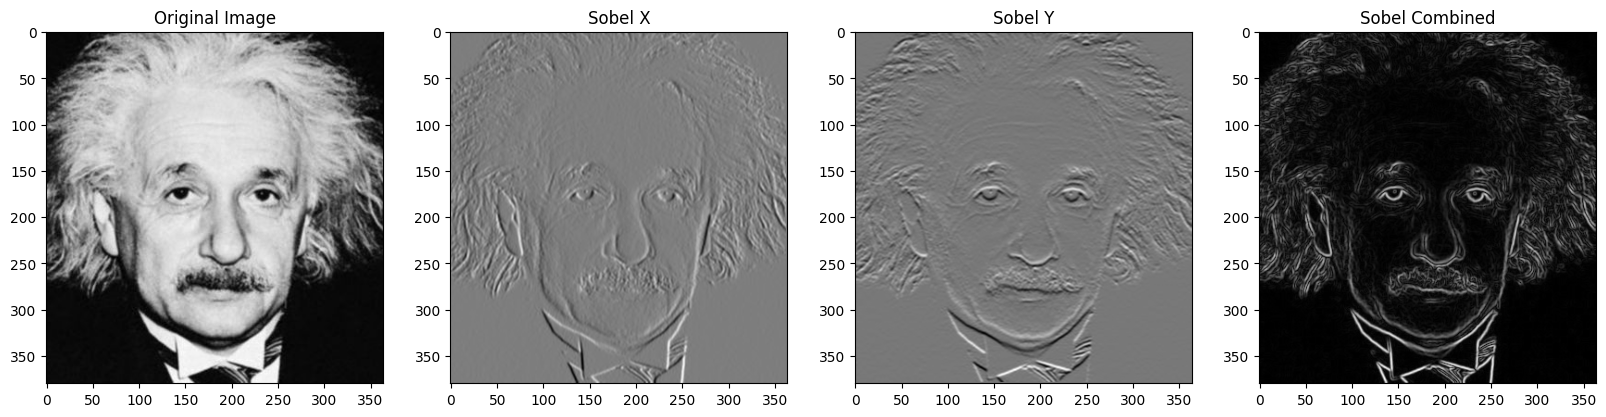

In [19]:
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernel for the x direction
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

# Sobel kernel for the y direction
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Apply Sobel filter in x and y direction using filter2D
sobel_x_img = cv.filter2D(img, cv.CV_64F, sobel_x)
sobel_y_img = cv.filter2D(img, cv.CV_64F, sobel_y)

# Combine both results
sobel_combined = np.sqrt(sobel_x_img**2 + sobel_y_img**2)


# Plot the images
plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x_img, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y_img, cmap='gray')
plt.title('Sobel Y')
plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')

plt.show()

b)

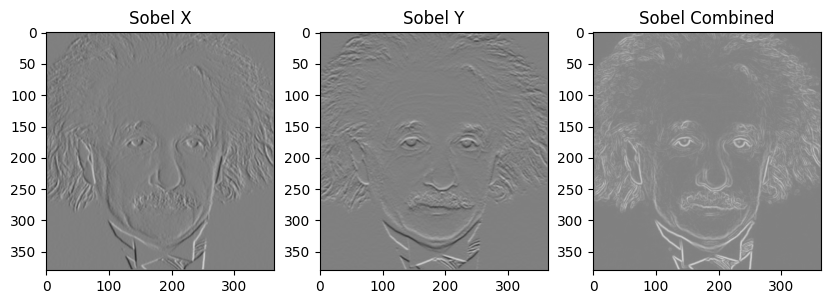

In [20]:
def sobel_filter(img):
    # Sobel x and y kernels
    sobel_x = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    # Get image dimensions
    rows, cols = img.shape
    
    # Initialize output images for x and y direction filters
    filtered_x = np.zeros_like(img, dtype=np.float64)
    filtered_y = np.zeros_like(img, dtype=np.float64)
    
    # Apply convolution
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extracting the 3x3 region around each pixel
            region = img[i-1:i+2, j-1:j+2]
            
            # Convolution with sobel_x and sobel_y
            filtered_x[i, j] = np.sum(region * sobel_x)
            filtered_y[i, j] = np.sum(region * sobel_y)


    # Combine gradients
    sobel_combined = np.sqrt(np.square(filtered_x) + np.square(filtered_y))


    
    return filtered_x, filtered_y, sobel_combined

# Read the image
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Apply Sobel filter
sobel_x, sobel_y, sobel_combined = sobel_filter(img)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel Combined')

plt.show()

c)

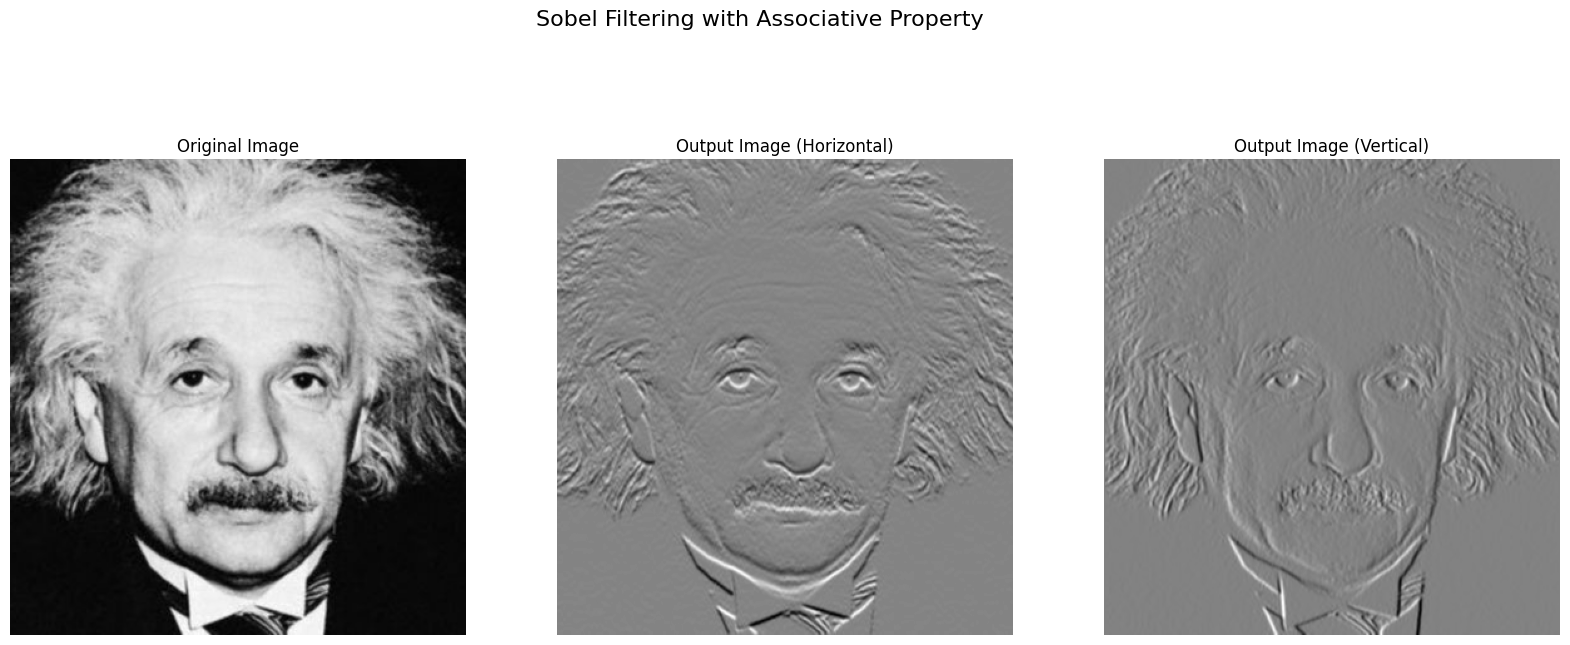

In [21]:
kernel_1 = np.array(((-1,), (0,), (1,)))
kernel_2 = np.array((1, 2, 1))

output_1 = cv.filter2D(img, cv.CV_64F, kernel_1)
output_1 = cv.filter2D(output_1, cv.CV_64F, kernel_2)

output_2 = cv.filter2D(img, cv.CV_64F, kernel_1.T)
output_2 = cv.filter2D(output_2, cv.CV_64F, kernel_2.T)

plt.figure(figsize=(20, 8))
plt.suptitle('Sobel Filtering with Associative Property',fontsize=16)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_1, cmap='gray')
plt.title('Output Image (Horizontal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_2, cmap='gray')
plt.title('Output Image (Vertical)')
plt.axis('off')

plt.show()
